In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

In [ ]:
dataset = pd.read_csv("football.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


In [ ]:
print(dataset["interveningTeammates"].unique())
print(dataset["interveningOpponents"].unique())
print(dataset["bodyPart"].unique())
print(dataset["interferenceOnShooter"].unique())
print(dataset["playType"].unique())
print(dataset["outcome"].value_counts())
print(dataset["interferenceOnShooter"].value_counts())
print(dataset["bodyPart"].value_counts())
print(dataset["interveningOpponents"].value_counts())
print(dataset["x"].describe())
print(dataset["y"].describe())

[0 2 1 3 4 5 7]
[ 1  3  6  4  2  8  5  7  0  9 10 11]
['right foot' 'left foot' 'head' 'other']
['medium' 'low' 'high' nan]
['open play' 'free kick' 'penalty' 'olimpico']
outcome
missed chance      3470
saved by keeper    2395
blocked shot       1771
goal               1081
hit the post        174
Name: count, dtype: int64
interferenceOnShooter
medium    4186
low       3315
high      1390
Name: count, dtype: int64
bodyPart
right foot    4454
left foot     2897
head          1515
other           59
Name: count, dtype: int64
interveningOpponents
2     3150
3     2135
1     1885
4      879
5      399
6      217
7      119
0       97
8       38
9        3
10       2
11       1
Name: count, dtype: int64
count    8925.000000
mean       14.564631
std         7.841865
min         0.000000
25%         8.480000
50%        12.470000
75%        20.950000
max        70.820000
Name: x, dtype: float64
count    8925.000000
mean        0.364408
std         8.999063
min       -33.920000
25%        -5.74

In [ ]:
dataset["goal"] = dataset["outcome"].apply(lambda x: 1 if x == 'goal' else 0).astype(bool)

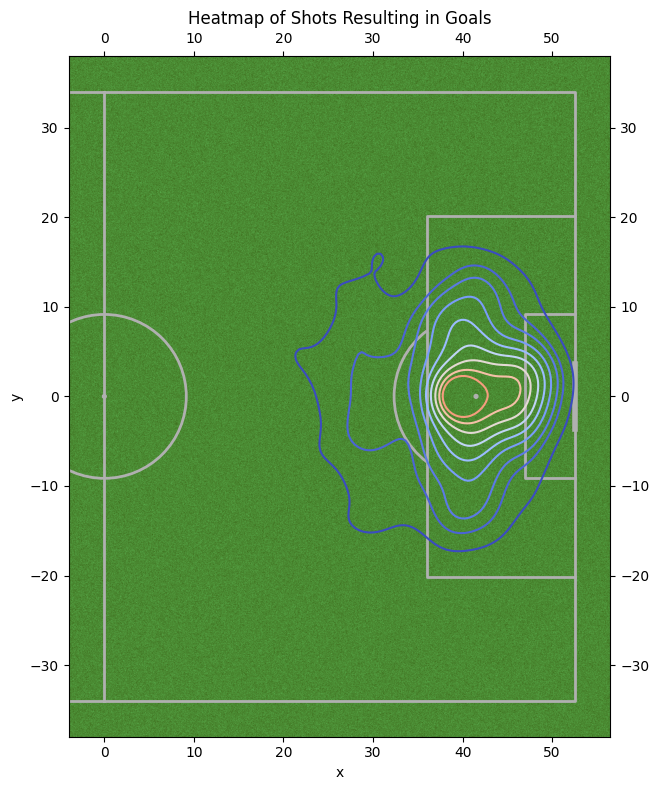

In [ ]:
goal_shots = dataset[dataset['goal'] == True]

pitch = Pitch(pitch_type='skillcorner', pitch_color='grass', axis=True, label=True, tick=True, half=True, pitch_length=105, pitch_width=68)

fig, ax = pitch.draw(figsize=(12, 8))
heatmap = sns.kdeplot(x= 52.5 -2.44 - goal_shots['x'] , y= goal_shots['y'], cmap='coolwarm')

plt.title('Heatmap of Shots Resulting in Goals')
plt.show()

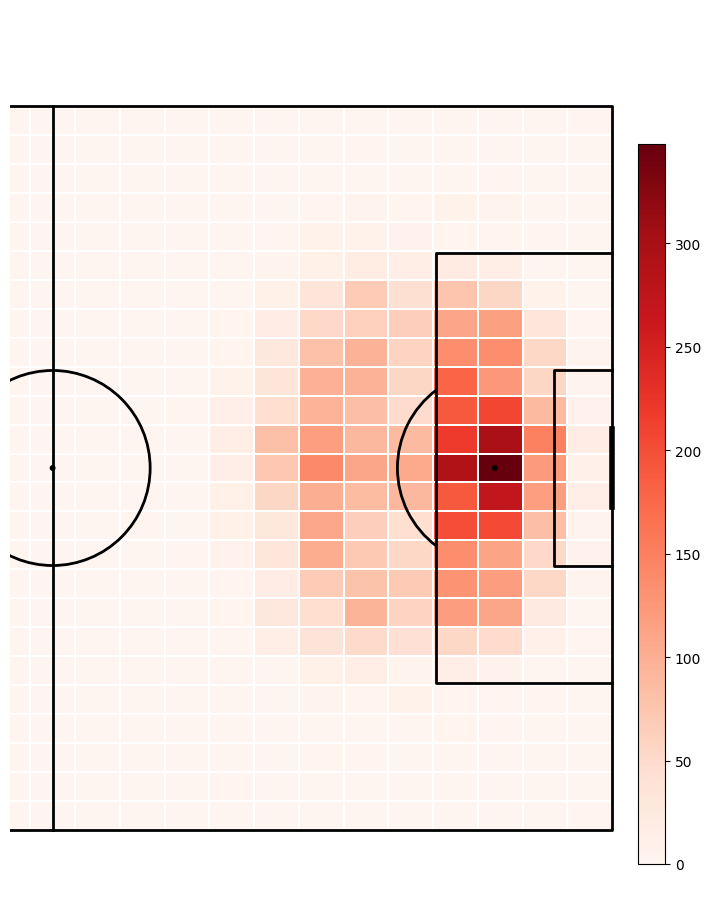

In [ ]:
pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)

bin_statistic_shots = pitch.bin_statistic(52.5 - 2.44 - dataset["x"], dataset["y"], bins=25)

pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0.01)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
plt.show()


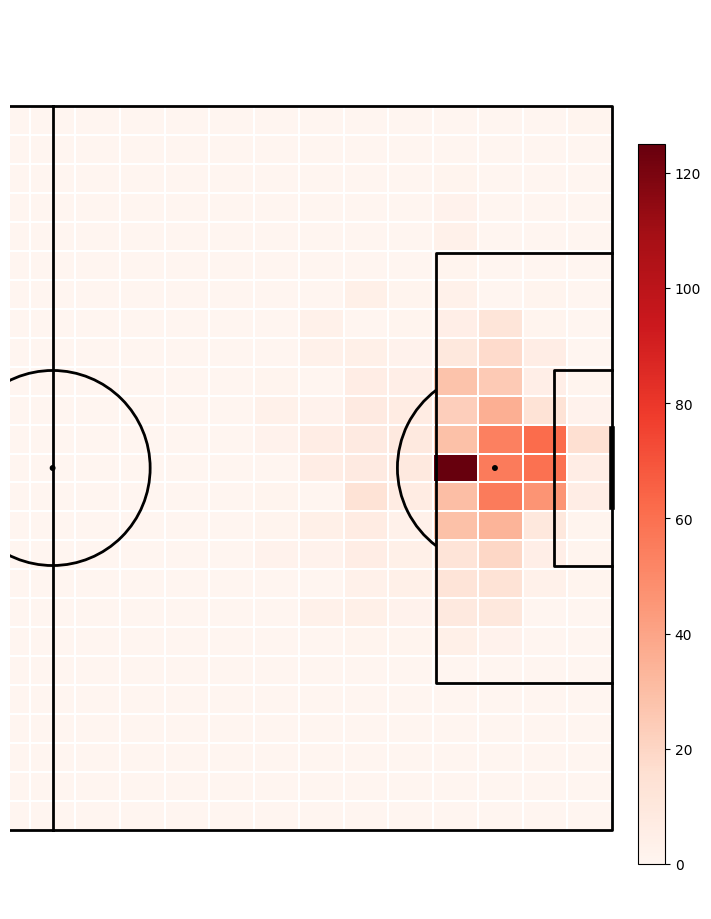

In [ ]:
pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)
goal_shots = dataset[dataset["goal"] == True]
bin_statistic_shots = pitch.bin_statistic(52.5 - 2.44 - goal_shots["x"], goal_shots["y"], bins=25)

pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0.01)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
plt.show()


In [ ]:
#TODO

pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)
goal_shots = dataset[dataset["goal"] == True]
bin_statistic= pitch.bin_statistic(52.5 - 2.44 - goal_shots["x"], goal_shots["y"], bins=25)


pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0.01)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
plt.show()


In [ ]:
dataset["angle"] =  np.degrees( np.where(   np.arctan(7.32 * dataset["x"] / (dataset["x"]**2 + dataset["y"]**2 - (7.32/2)**2)) > 0,
                                np.arctan(7.32 * dataset["x"] /(dataset["x"]**2 + dataset["y"]**2 - (7.32/2)**2)),
                                np.arctan(7.32 * dataset["x"] /(dataset["x"]**2 + dataset["y"]**2 - (7.32/2)**2)) + np.pi))
dataset[dataset["angle"] < 90].value_counts().sum()


8797

In [ ]:
def calculate_distance(x_values, y_values):
    distances = np.sqrt(np.power(x_values, 2) + np.power(y_values, 2))
    return distances

dataset["distance"] = calculate_distance(dataset["x"].to_numpy(), dataset["y"].to_numpy())

In [ ]:
print(dataset[(dataset["interferenceOnShooter"] == "high") & (dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print(dataset[(dataset["interferenceOnShooter"] == "low") & (dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print(dataset[(dataset["interferenceOnShooter"] == "medium") & (dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print("#############################################")
print("goals scored from penalties : ")
print(dataset[(dataset["playType"] == "penalty") & (dataset["goal"] == True)].value_counts().sum())
print("goals scored from open plays : ")
print(dataset[(dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print("goals scored from free kicks : ")
print(dataset[(dataset["playType"] == "free kick") & (dataset["goal"] == True)].value_counts().sum())
print("goals scored from corner kicks : ")
print(dataset[(dataset["playType"] == "olimpico") & (dataset["goal"] == True)].value_counts().sum())
print("#############################################")
print("goals scored from inside the box : ")
print(dataset[(dataset["goal"] == True) & (dataset["distance"] <= 18)].value_counts().sum())

89
413
447
#############################################
goals scored from penalties : 
97
goals scored from open plays : 
949
goals scored from free kicks : 
33
goals scored from corner kicks : 
2
#############################################
goals scored from inside the box : 
922


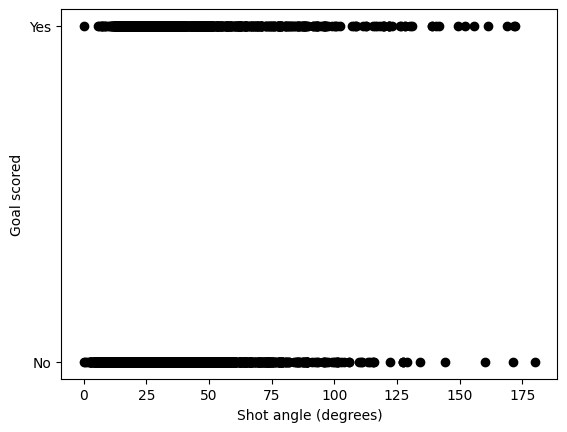

In [ ]:
fig, ax = plt.subplots()
ax.plot(dataset['angle'], dataset['goal'], linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()


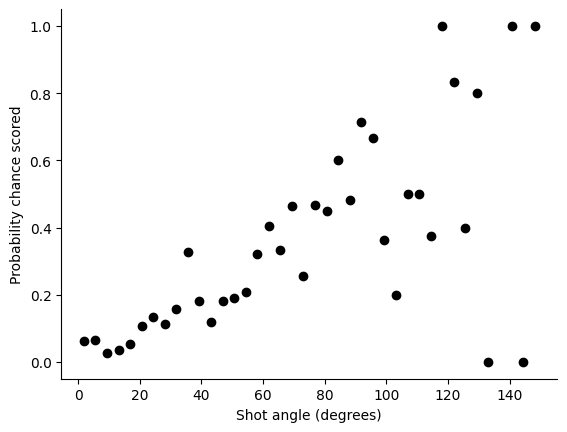

In [ ]:
shotcount_dist = np.histogram(dataset["angle"], bins=40, range=[0, 150])

goal_shots = dataset[dataset['goal'] == True]
goalcount_dist = np.histogram(goal_shots["angle"], bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')

prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2

fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


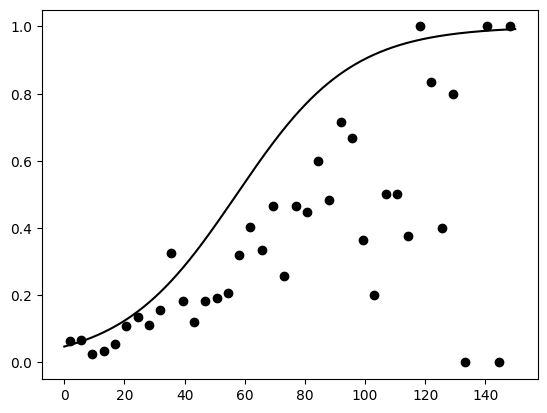

In [ ]:
fig, ax = plt.subplots()
b = [3, -3]
x = np.arange(150,step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x*np.pi/180))
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.plot(x, y, linestyle='solid', color='black')
plt.show()

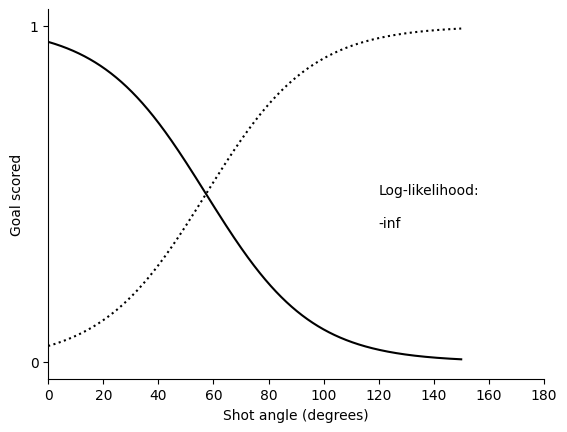

In [ ]:
xG = 1/(1+np.exp(b[0]+b[1]*dataset['angle']))
dataset = dataset.assign(xG = xG)
shots_40 = dataset.iloc[:40]
fig, ax = plt.subplots()
ax.plot(shots_40['angle']*180/np.pi, shots_40['goal'], linestyle='none', marker= '.', markersize= 12, color='black', zorder = 3)
ax.plot(x, y, linestyle=':', color='black', zorder = 2)
ax.plot(x, 1-y, linestyle='solid', color='black', zorder = 2)
loglikelihood=0
for item,shot in shots_40.iterrows():
    ang = shot['angle'] * 180/np.pi
    if shot['goal'] == 1:
        loglikelihood = loglikelihood + np.log(shot['xG'])
        ax.plot([ang,ang],[shot['goal'],1-shot['xG']], color='red', zorder = 1)
    else:
        loglikelihood = loglikelihood + np.log(1 - shot['xG'])
        ax.plot([ang,ang], [shot['goal'], 1-shot['xG']], color='blue', zorder = 1)
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
plt.xlim((0,180))
plt.text(120,0.5,'Log-likelihood:')
plt.text(120,0.4,str(loglikelihood)[:6])
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [ ]:
shotcount_dist = np.histogram(dataset['distance'],bins=40,range=[0, 70])
goal_shots = dataset[dataset['goal'] == True]
goalcount_dist = np.histogram(goal_shots['Distance'],bins=40,range=[0, 70])
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


test_model = smf.glm(formula="Goal ~ Distance" , data=dataset,
                            family=sm.families.Binomial()).fit()
print(test_model.summary())
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance))
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()


things to further examine : 
1) interventions
2) intergerence on shooters
3) distance and distance squared and goal probability
4) more heat maps